## Estudo sobre previsão dos valores do CUB usando PROPHET
- dados do CUB - SP (Sinduscon)
- Base de 2007 a 2019 - mensal
- https://facebook.github.io/prophet/docs/quick_start.html


In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt

from fbprophet import Prophet

### CUB SP R16N

In [2]:
# Abrindo o df
df = pd.read_excel('CUB_SP_R16N.xlsx')

In [3]:
#Criar coluna com a data
df['data'] = df['ano'].map(str) + '-' + df['mes'].map(str)

In [4]:
df.head()

,ano,mes,preco_global,preco_MO,preco_MAT,preco_ADM,data
0,2007,1,675.58,336.75,323.57,15.26,2007-1
1,2007,2,675.58,336.75,323.57,15.26,2007-2
2,2007,3,676.61,337.78,323.29,15.53,2007-3
3,2007,4,681.32,340.96,324.84,15.53,2007-4
4,2007,5,689.51,348.07,325.07,16.37,2007-5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ano           152 non-null    int64  
 1   mes           152 non-null    int64  
 2   preco_global  152 non-null    float64
 3   preco_MO      152 non-null    float64
 4   preco_MAT     152 non-null    float64
 5   preco_ADM     152 non-null    float64
 6   data          152 non-null    object 
dtypes: float64(4), int64(2), object(1)
memory usage: 8.4+ KB


In [6]:
#Transformar o valor str em data
df['data'] = pd.to_datetime(df['data'], format = '%Y-%m')

In [7]:
df.head()

,ano,mes,preco_global,preco_MO,preco_MAT,preco_ADM,data
0,2007,1,675.58,336.75,323.57,15.26,2007-01-01
1,2007,2,675.58,336.75,323.57,15.26,2007-02-01
2,2007,3,676.61,337.78,323.29,15.53,2007-03-01
3,2007,4,681.32,340.96,324.84,15.53,2007-04-01
4,2007,5,689.51,348.07,325.07,16.37,2007-05-01


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   ano           152 non-null    int64         
 1   mes           152 non-null    int64         
 2   preco_global  152 non-null    float64       
 3   preco_MO      152 non-null    float64       
 4   preco_MAT     152 non-null    float64       
 5   preco_ADM     152 non-null    float64       
 6   data          152 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(2)
memory usage: 8.4 KB


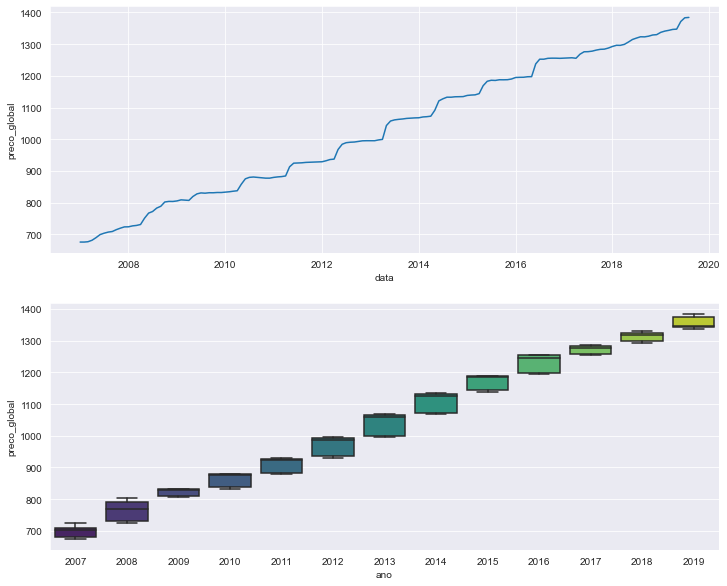

In [9]:
#Visualizar os dados - PREÇO GLOBAL - CUB R16N - São Paulo
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(12,10))

sns.lineplot(x= 'data', y = 'preco_global', data=df, ax = ax1)
sns.boxplot(x = 'ano', y = 'preco_global', data=df, ax = ax2, palette = 'viridis');

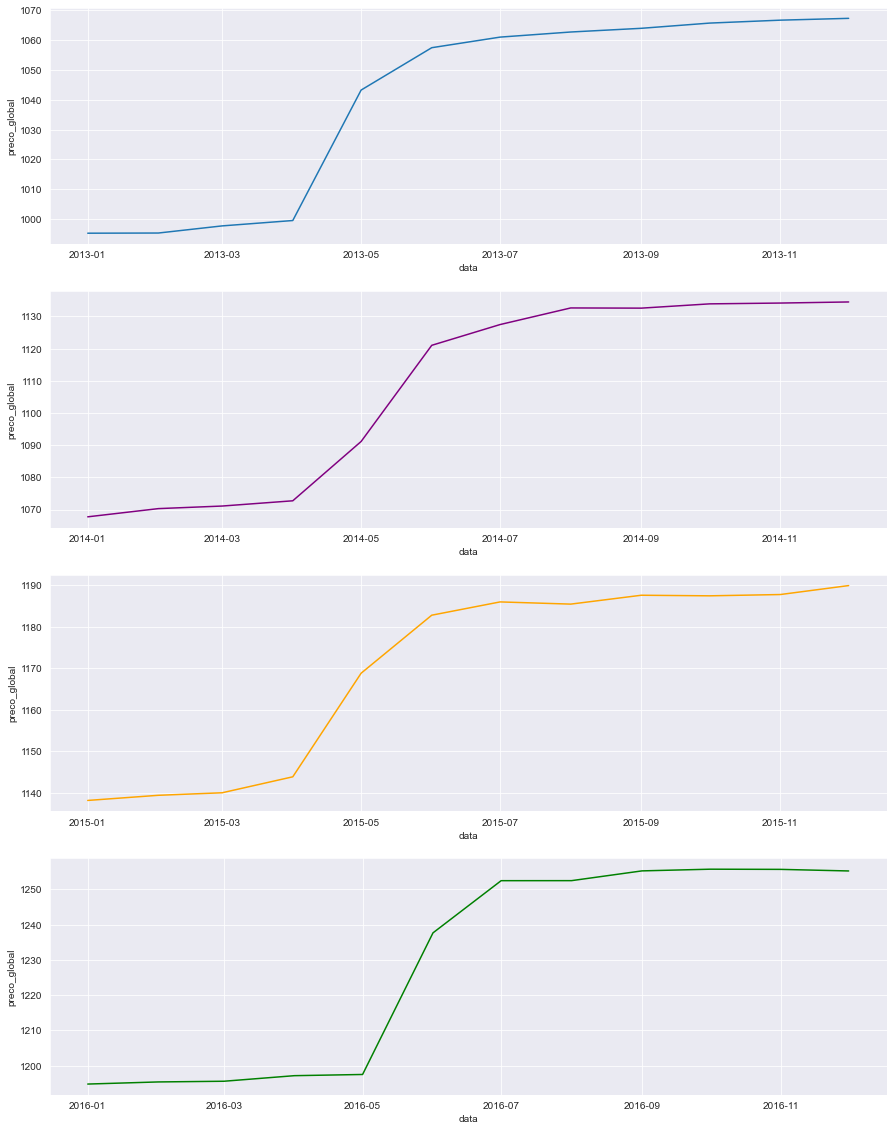

In [38]:
#Visualizar os dados - PREÇO GLOBAL - padrão de variação dos valores no ano
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1,figsize=(15,20))

sns.lineplot(x= 'data', y = 'preco_global', data=df.loc[df['ano']==2013], ax = ax1)
sns.lineplot(x= 'data', y = 'preco_global', data=df.loc[df['ano']==2014], ax = ax2, color='purple')
sns.lineplot(x= 'data', y = 'preco_global', data=df.loc[df['ano']==2015], ax = ax3, color='orange')
sns.lineplot(x= 'data', y = 'preco_global', data=df.loc[df['ano']==2016], ax = ax4, color='green');

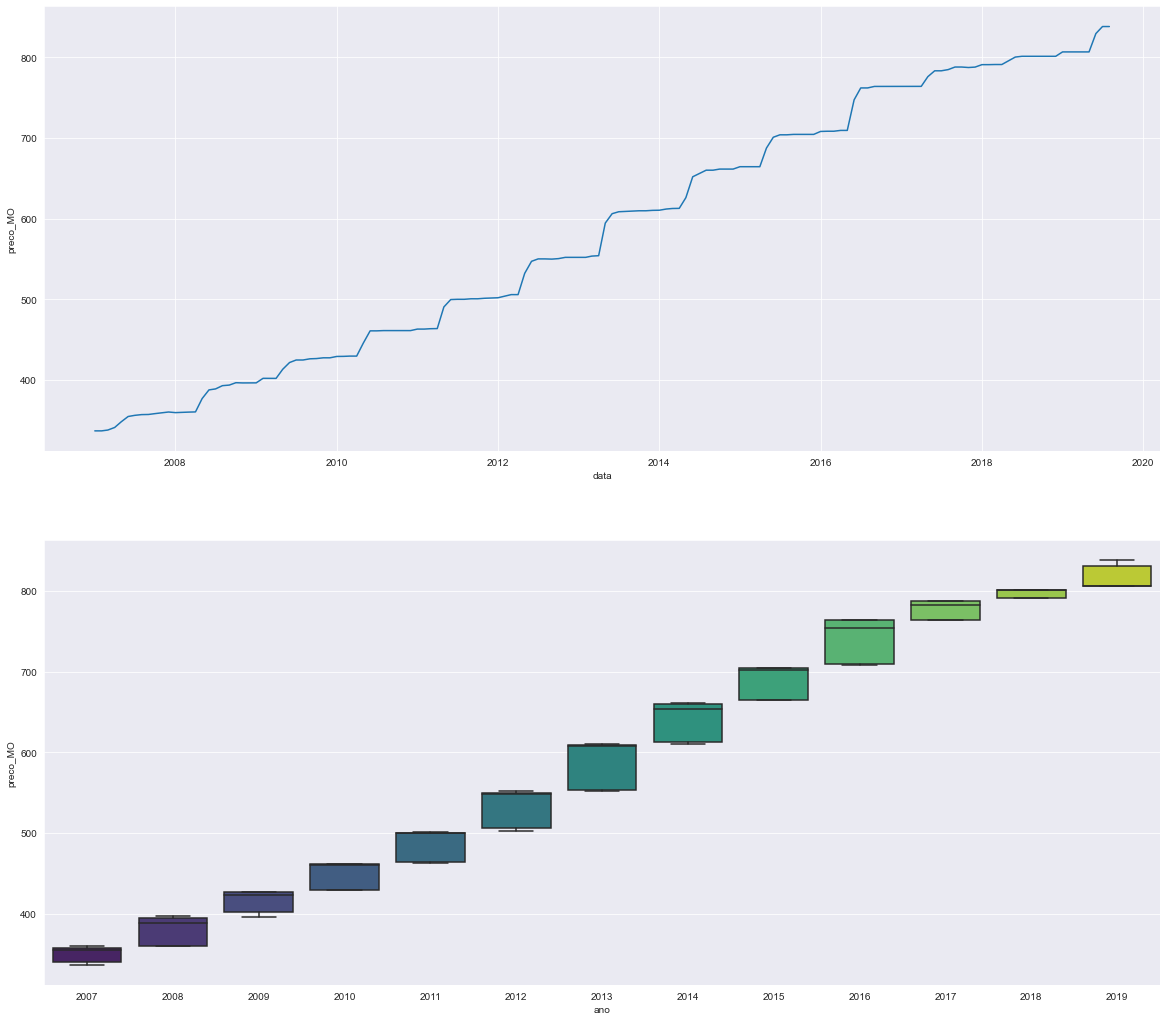

In [11]:
#Visualizar os dados - PREÇO MÃO-DE-OBRA
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(20,18))

sns.lineplot(x= 'data', y = 'preco_MO', data=df, ax = ax1)
sns.boxplot(x = 'ano', y = 'preco_MO', data=df, ax = ax2, palette = 'viridis');

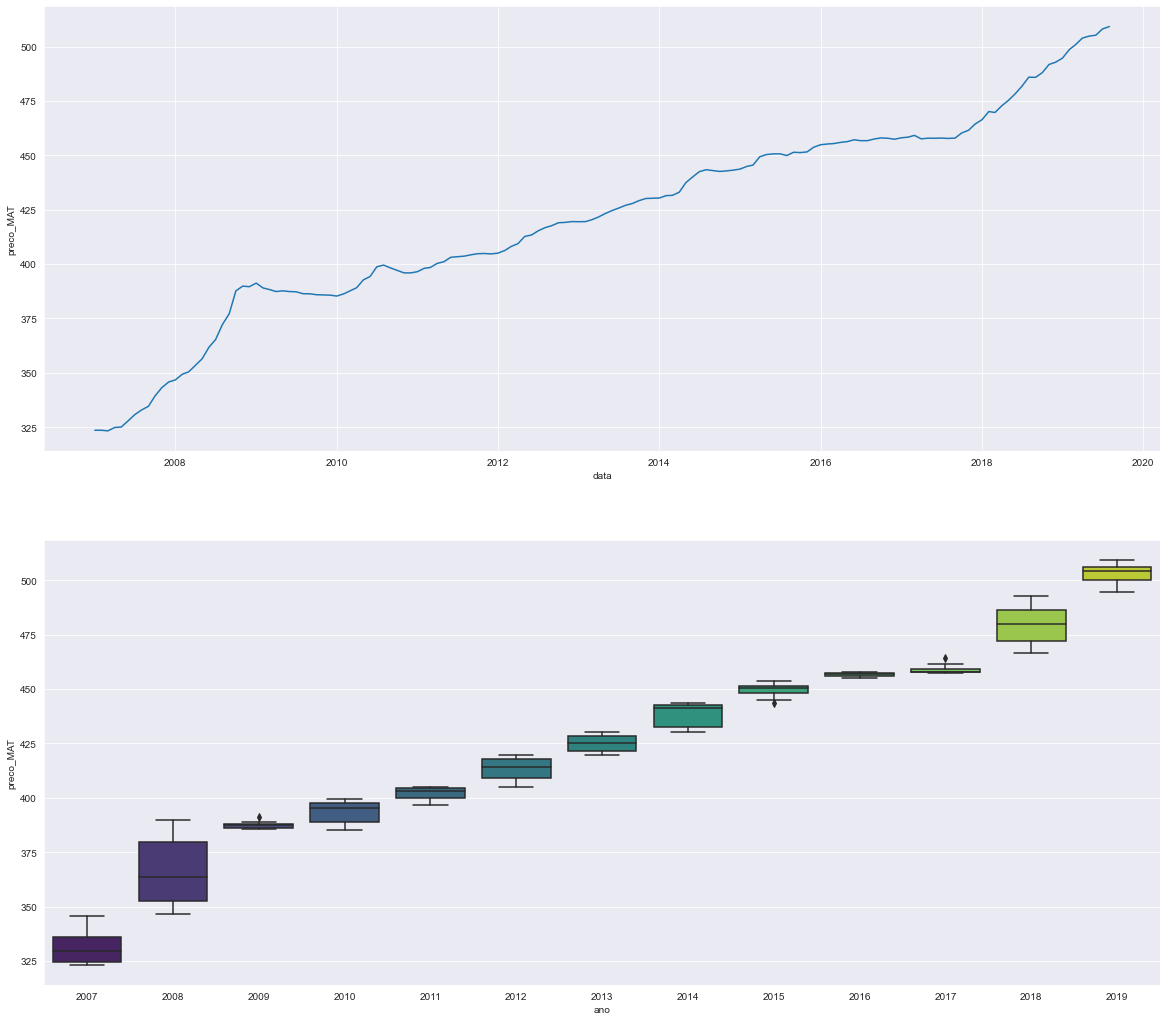

In [12]:
#Visualizar os dados - PREÇO MATERIAL
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(20,18))

sns.lineplot(x= 'data', y = 'preco_MAT', data=df, ax = ax1)
sns.boxplot(x = 'ano', y = 'preco_MAT', data=df, ax = ax2, palette = 'viridis');

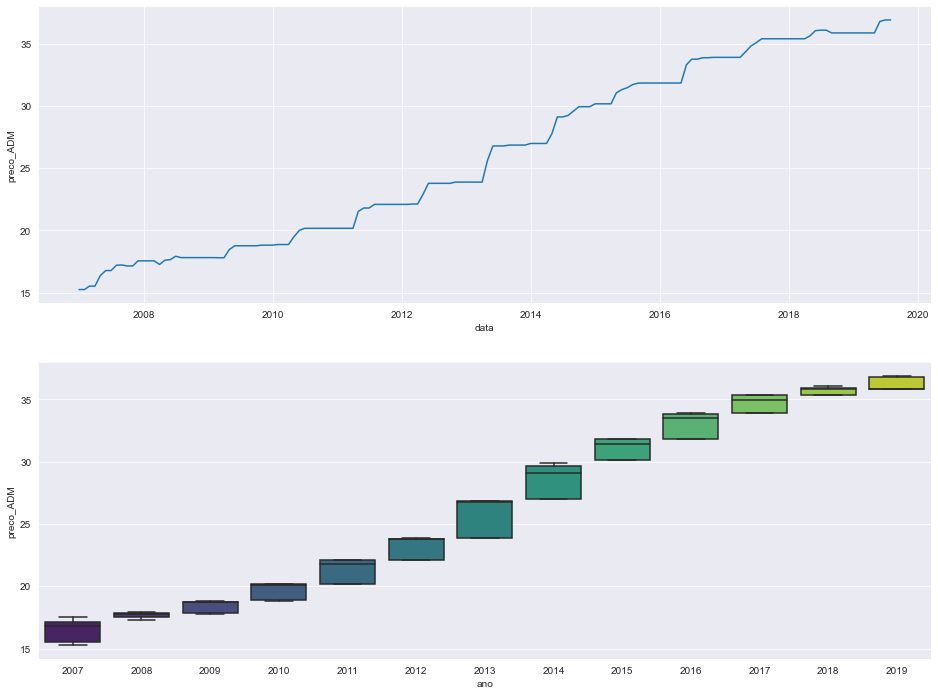

In [13]:
#Visualizar os dados - PREÇO ADMINISTRAÇÃO
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(16,12))

sns.lineplot(x= 'data', y = 'preco_ADM', data=df, ax = ax1)
sns.boxplot(x = 'ano', y = 'preco_ADM', data=df, ax = ax2, palette = 'viridis');

In [14]:
#treinar com os valores de 2007-01-01 a 2019-06-01 | testar com os valores de 2019-07-01 a 2019-12-01
df_train = df.loc[df['ano'] <= 2018]
df_test = df.loc[df['ano'] == 2019]

In [15]:
df_train.tail()

,ano,mes,preco_global,preco_MO,preco_MAT,preco_ADM,data
139,2018,8,1323.23,801.22,485.94,36.07,2018-08-01
140,2018,9,1322.96,801.22,485.89,35.85,2018-09-01
141,2018,10,1325.07,801.22,488.00,35.85,2018-10-01
142,2018,11,1328.88,801.22,491.81,35.85,2018-11-01
143,2018,12,1329.92,801.22,492.85,35.85,2018-12-01


In [16]:
df_test

,ano,mes,preco_global,preco_MO,preco_MAT,preco_ADM,data
144,2019,1,1337.25,806.66,494.74,35.85,2019-01-01
145,2019,2,1341.18,806.66,498.67,35.85,2019-02-01
146,2019,3,1343.42,806.66,500.91,35.85,2019-03-01
147,2019,4,1346.44,806.66,503.93,35.85,2019-04-01
148,2019,5,1347.34,806.66,504.83,35.85,2019-05-01
149,2019,6,1371.45,829.41,505.27,36.77,2019-06-01
150,2019,7,1383.15,838.13,508.13,36.89,2019-07-01
151,2019,8,1384.26,838.13,509.24,36.89,2019-08-01


### Ajustando o df de train para o formato do PROPHET

In [17]:
#usando os valores de preco_global
df_1 = df_train[['data', 'preco_global']]

In [18]:
#Padronizar as colunas para o modelo
df_1.columns = ['ds', 'y']

In [19]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      144 non-null    datetime64[ns]
 1   y       144 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.4 KB


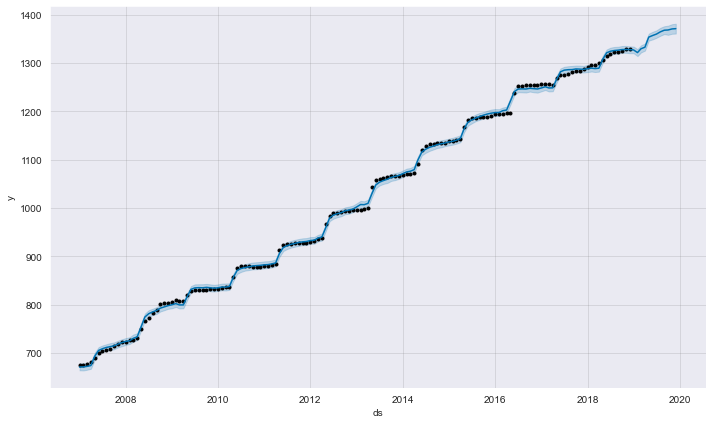

In [39]:
# Rodando o modelo - considerando sazonalidade dentro dos anos e fazendo previsão mensal
m1 = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False).fit(df_1)
future1 = m1.make_future_dataframe(periods=12, freq='M')
fcst1 = m1.predict(future1)
fig1 = m1.plot(fcst1)

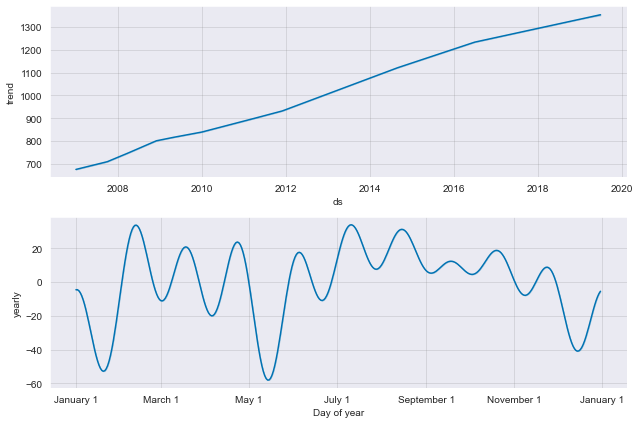

In [21]:
#Componentes do modelo - sazonalidade e tendência
fig2 = m1.plot_components(fcst1)

In [60]:
#Valores previstos
model1 = fcst1[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
model1 = model1.round(2)
model1.tail(12)

,ds,yhat,yhat_lower,yhat_upper
144,2018-12-31,1327.33,1320.60,1334.30
145,2019-01-31,1321.84,1314.57,1328.92
146,2019-02-28,1329.79,1322.11,1336.85
147,2019-03-31,1332.95,1325.92,1340.59
148,2019-04-30,1353.78,1346.59,1361.01
149,2019-05-31,1357.19,1349.11,1364.92
150,2019-06-30,1360.10,1352.45,1367.90
151,2019-07-31,1364.74,1356.68,1373.11
152,2019-08-31,1368.11,1360.12,1376.39
153,2019-09-30,1368.59,1358.58,1377.54


In [61]:
#Separar o modelo com as dados de 2019 para comparar com os valores reais
model1 = model1.loc[model1['ds'] >= '2019-01-01']

In [62]:
model1['ano'] = model1['ds'].dt.year
model1['mes'] = model1['ds'].dt.month

In [63]:
model1 = model1.loc[model1['mes']<=8]

In [64]:
model1

,ds,yhat,yhat_lower,yhat_upper,ano,mes
145,2019-01-31,1321.84,1314.57,1328.92,2019,1
146,2019-02-28,1329.79,1322.11,1336.85,2019,2
147,2019-03-31,1332.95,1325.92,1340.59,2019,3
148,2019-04-30,1353.78,1346.59,1361.01,2019,4
149,2019-05-31,1357.19,1349.11,1364.92,2019,5
150,2019-06-30,1360.10,1352.45,1367.90,2019,6
151,2019-07-31,1364.74,1356.68,1373.11,2019,7
152,2019-08-31,1368.11,1360.12,1376.39,2019,8


In [65]:
model1['data'] = model1['ano'].map(str) + '-' + model1['mes'].map(str)
model1['ds'] = pd.to_datetime(model1['data'], format = '%Y-%m')

In [66]:
model1.drop(['ano', 'mes', 'data'], axis=1, inplace=True)
model1

,ds,yhat,yhat_lower,yhat_upper
145,2019-01-01,1321.84,1314.57,1328.92
146,2019-02-01,1329.79,1322.11,1336.85
147,2019-03-01,1332.95,1325.92,1340.59
148,2019-04-01,1353.78,1346.59,1361.01
149,2019-05-01,1357.19,1349.11,1364.92
150,2019-06-01,1360.10,1352.45,1367.90
151,2019-07-01,1364.74,1356.68,1373.11
152,2019-08-01,1368.11,1360.12,1376.39


In [67]:
model1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 145 to 152
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   ds          8 non-null      datetime64[ns]
 1   yhat        8 non-null      float64       
 2   yhat_lower  8 non-null      float64       
 3   yhat_upper  8 non-null      float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 320.0 bytes


In [68]:
df_test1 = df_test[['data', 'preco_global']]
df_test1.columns = ['ds', 'y']

In [69]:
df_test1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 144 to 151
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      8 non-null      datetime64[ns]
 1   y       8 non-null      float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 192.0 bytes


In [70]:
#juntando os valores de teste e previsão para analisar a qualidade do modelo
df_val = pd.merge(df_test1, model1, on='ds')
df_val

,ds,y,yhat,yhat_lower,yhat_upper
0,2019-01-01,1337.25,1321.84,1314.57,1328.92
1,2019-02-01,1341.18,1329.79,1322.11,1336.85
2,2019-03-01,1343.42,1332.95,1325.92,1340.59
3,2019-04-01,1346.44,1353.78,1346.59,1361.01
4,2019-05-01,1347.34,1357.19,1349.11,1364.92
5,2019-06-01,1371.45,1360.10,1352.45,1367.90
6,2019-07-01,1383.15,1364.74,1356.68,1373.11
7,2019-08-01,1384.26,1368.11,1360.12,1376.39


In [71]:
df_val['dif'] = df_val['y'] - df_val['yhat']
df_val

,ds,y,yhat,yhat_lower,yhat_upper,dif
0,2019-01-01,1337.25,1321.84,1314.57,1328.92,15.41
1,2019-02-01,1341.18,1329.79,1322.11,1336.85,11.39
2,2019-03-01,1343.42,1332.95,1325.92,1340.59,10.47
3,2019-04-01,1346.44,1353.78,1346.59,1361.01,-7.34
4,2019-05-01,1347.34,1357.19,1349.11,1364.92,-9.85
5,2019-06-01,1371.45,1360.10,1352.45,1367.90,11.35
6,2019-07-01,1383.15,1364.74,1356.68,1373.11,18.41
7,2019-08-01,1384.26,1368.11,1360.12,1376.39,16.15


In [72]:
df_val.describe().round(2)

,y,yhat,yhat_lower,yhat_upper,dif
count,8.00,8.00,8.00,8.00,8.00
mean,1356.81,1348.56,1340.94,1356.21,8.25
std,19.51,17.68,17.41,18.09,10.77
min,1337.25,1321.84,1314.57,1328.92,-9.85
25%,1342.86,1332.16,1324.97,1339.65,6.02
50%,1346.89,1355.48,1347.85,1362.96,11.37
75%,1374.38,1361.26,1353.51,1369.20,15.60
max,1384.26,1368.11,1360.12,1376.39,18.41


In [73]:
df_val['mes'] = df_val['ds'].dt.month

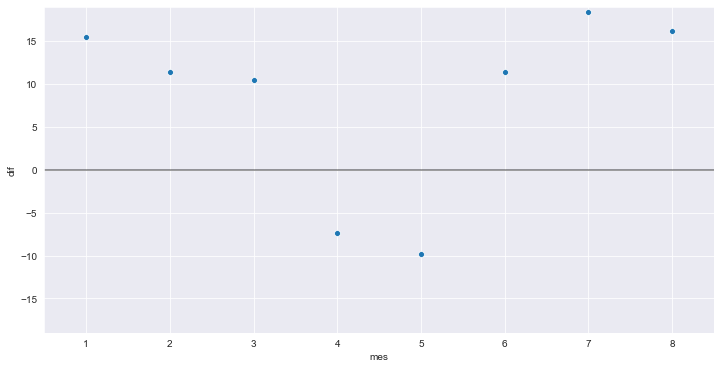

In [75]:
#Análise dos erros - estão na faixa de R$10 a R$16
fig, ax = plt.subplots(figsize=(12,6))
plt.ylim(-19,19)
plt.xlim(0.5,8.5)
ref = 0
ref2 = [*range(0, 10)]
sns.scatterplot(x = 'mes', y = 'dif', data=df_val)
sns.lineplot(x = ref2, y = ref, color = 'black', alpha=0.5);

In [76]:
print('Soma dos erros: R$', df_val['dif'].sum().round(2))
print('Média dos erros: R$', df_val['dif'].mean().round(2))

Soma dos erros: R$ 65.99
Média dos erros: R$ 8.25


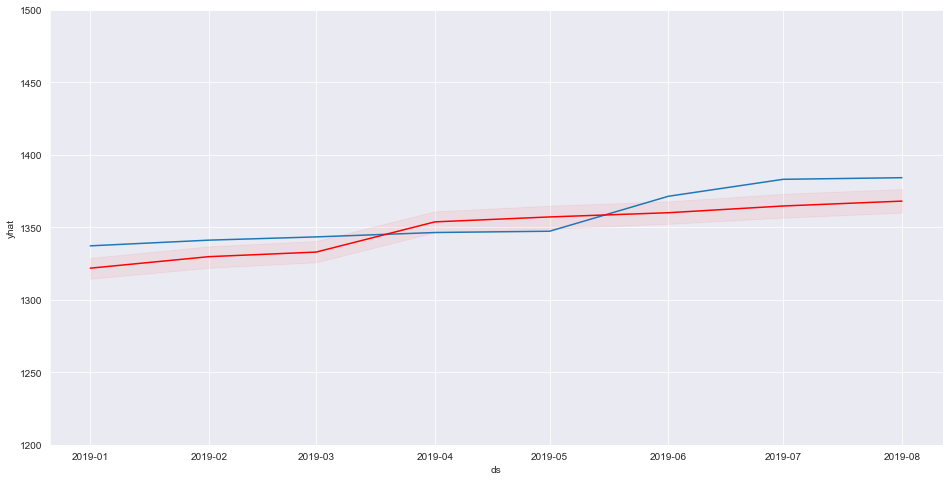

In [77]:
#Comparando o valor real do previsto para 2019 - teve um atraso em 2019 no aumento mais significativo do ano
fig, ax = plt.subplots(figsize=(16,8))
plt.ylim(1200,1500)

sns.lineplot(x='ds', y='y', data=df_val)
sns.lineplot(x='ds', y='yhat', data=df_val, color='red')
ax.fill_between(df_val['ds'], df_val['yhat_upper'], df_val['yhat_lower'], color='red', alpha=0.06);

### CUB SP PIS

In [78]:
# Abrindo o df
df2 = pd.read_excel('CUB_SP_PIS.xlsx')

In [79]:
df2.dropna(inplace=True)

In [80]:
df2['ano'] = df2['ano'].astype('int64')
df2['mes'] = df2['mes'].astype('int64')

In [81]:
#Criar coluna com a data
df2['data'] = df2['ano'].map(str) + '-' + df2['mes'].map(str)

In [82]:
df2.tail()

,ano,mes,preco_global,preco_MO,preco_MAT,preco_ADM,data
147,2019,4,925.21,509.57,394.96,20.68,2019-4
148,2019,5,925.60,509.57,395.35,20.68,2019-5
149,2019,6,941.49,523.96,396.32,21.21,2019-6
150,2019,7,949.47,529.40,398.79,21.28,2019-7
151,2019,8,950.01,529.40,399.33,21.28,2019-8


In [83]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152 entries, 0 to 151
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ano           152 non-null    int64  
 1   mes           152 non-null    int64  
 2   preco_global  152 non-null    float64
 3   preco_MO      152 non-null    float64
 4   preco_MAT     152 non-null    float64
 5   preco_ADM     152 non-null    float64
 6   data          152 non-null    object 
dtypes: float64(4), int64(2), object(1)
memory usage: 9.5+ KB


In [84]:
#Transformar o valor str em data
df2['data'] = pd.to_datetime(df2['data'], format = '%Y-%m')

In [85]:
df2.head()

,ano,mes,preco_global,preco_MO,preco_MAT,preco_ADM,data
0,2007,1,474.25,211.65,253.79,8.80,2007-01-01
1,2007,2,474.25,211.65,253.79,8.80,2007-02-01
2,2007,3,475.31,212.30,254.05,8.96,2007-03-01
3,2007,4,476.99,214.57,253.46,8.96,2007-04-01
4,2007,5,483.62,218.65,255.53,9.44,2007-05-01


In [86]:
df2.tail()

,ano,mes,preco_global,preco_MO,preco_MAT,preco_ADM,data
147,2019,4,925.21,509.57,394.96,20.68,2019-04-01
148,2019,5,925.60,509.57,395.35,20.68,2019-05-01
149,2019,6,941.49,523.96,396.32,21.21,2019-06-01
150,2019,7,949.47,529.40,398.79,21.28,2019-07-01
151,2019,8,950.01,529.40,399.33,21.28,2019-08-01


In [87]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152 entries, 0 to 151
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   ano           152 non-null    int64         
 1   mes           152 non-null    int64         
 2   preco_global  152 non-null    float64       
 3   preco_MO      152 non-null    float64       
 4   preco_MAT     152 non-null    float64       
 5   preco_ADM     152 non-null    float64       
 6   data          152 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(2)
memory usage: 9.5 KB


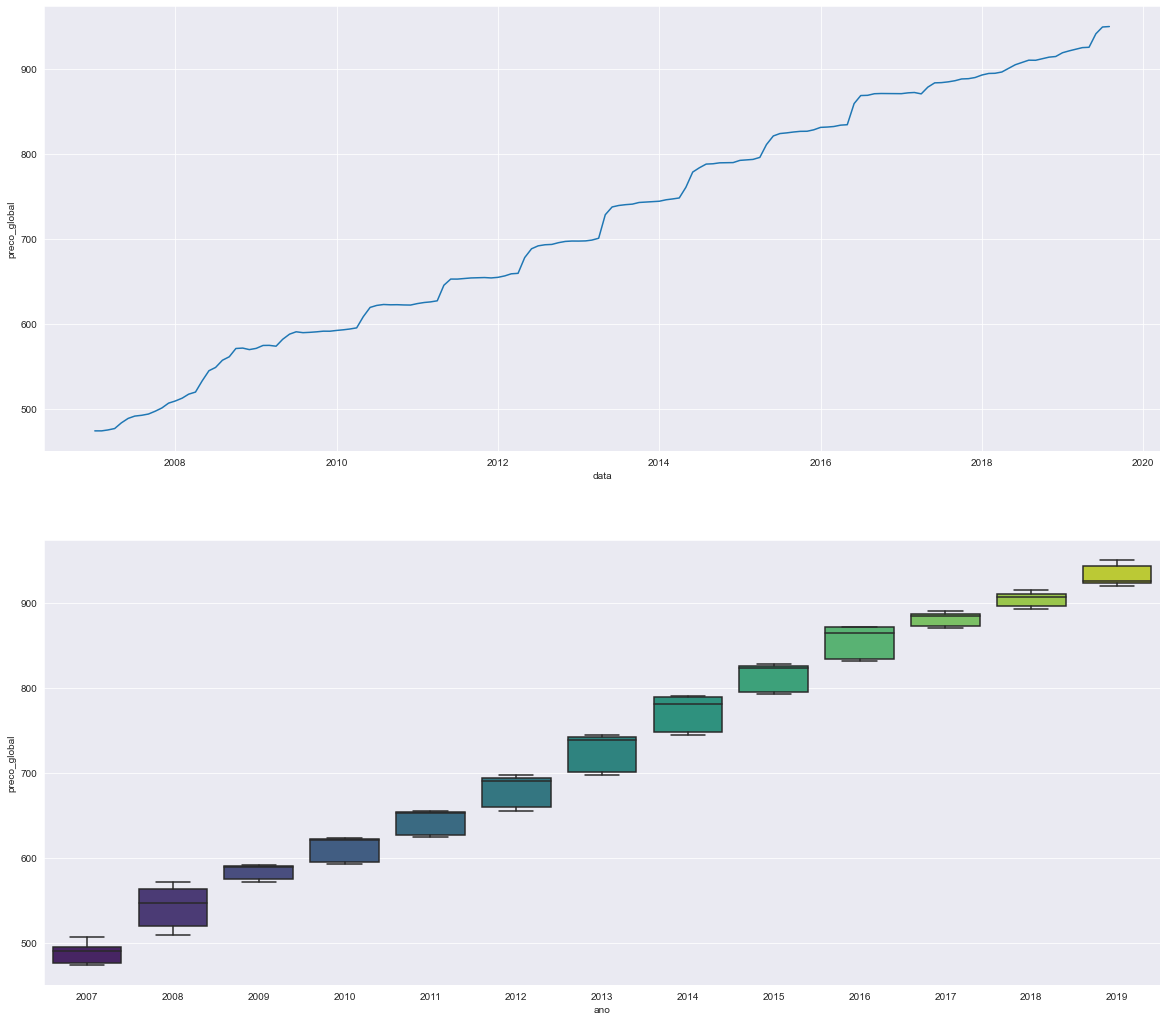

In [88]:
#Visualizar os dados - PREÇO GLOBAL
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(20,18))

sns.lineplot(x= 'data', y = 'preco_global', data=df2, ax = ax1)
sns.boxplot(x = 'ano', y = 'preco_global', data=df2, ax = ax2, palette = 'viridis');

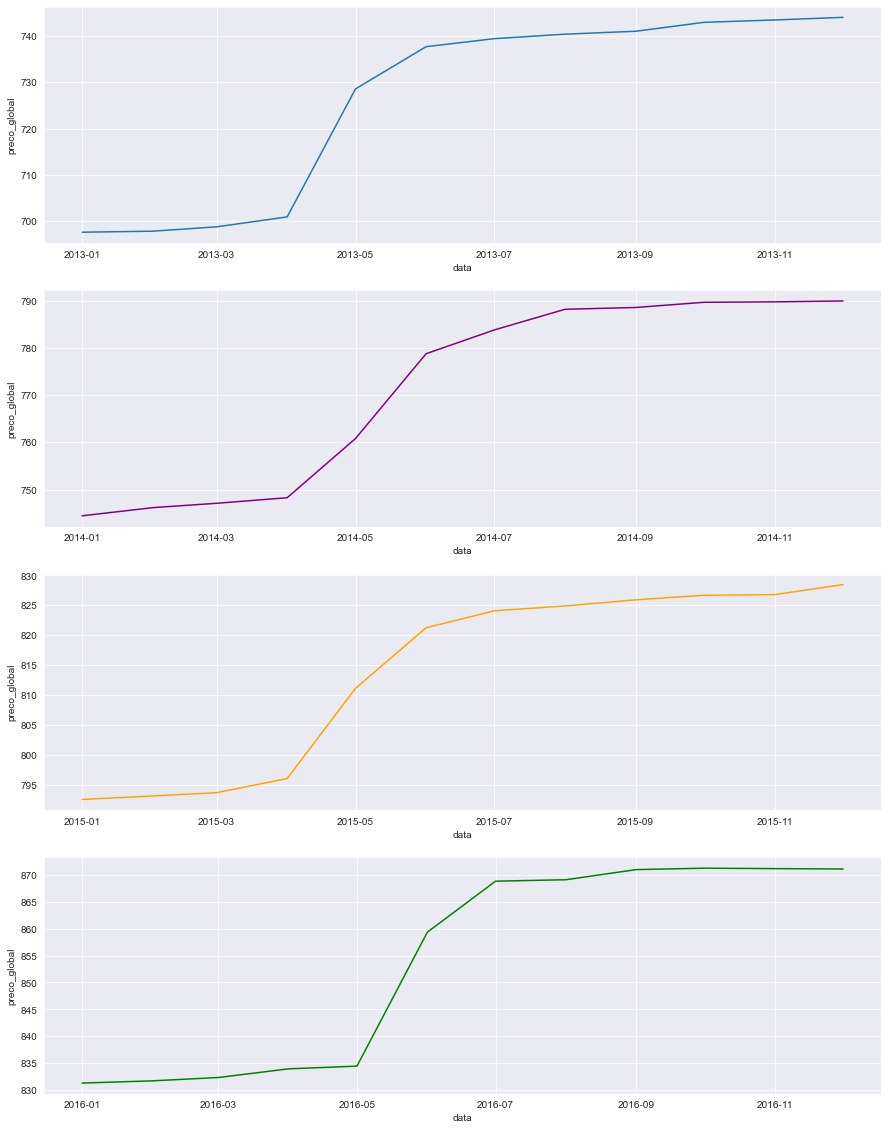

In [89]:
#Visualizar os dados - PREÇO GLOBAL
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1,figsize=(15,20))

sns.lineplot(x= 'data', y = 'preco_global', data=df2.loc[df['ano']==2013], ax = ax1)
sns.lineplot(x= 'data', y = 'preco_global', data=df2.loc[df['ano']==2014], ax = ax2, color='purple')
sns.lineplot(x= 'data', y = 'preco_global', data=df2.loc[df['ano']==2015], ax = ax3, color='orange')
sns.lineplot(x= 'data', y = 'preco_global', data=df2.loc[df['ano']==2016], ax = ax4, color='green');

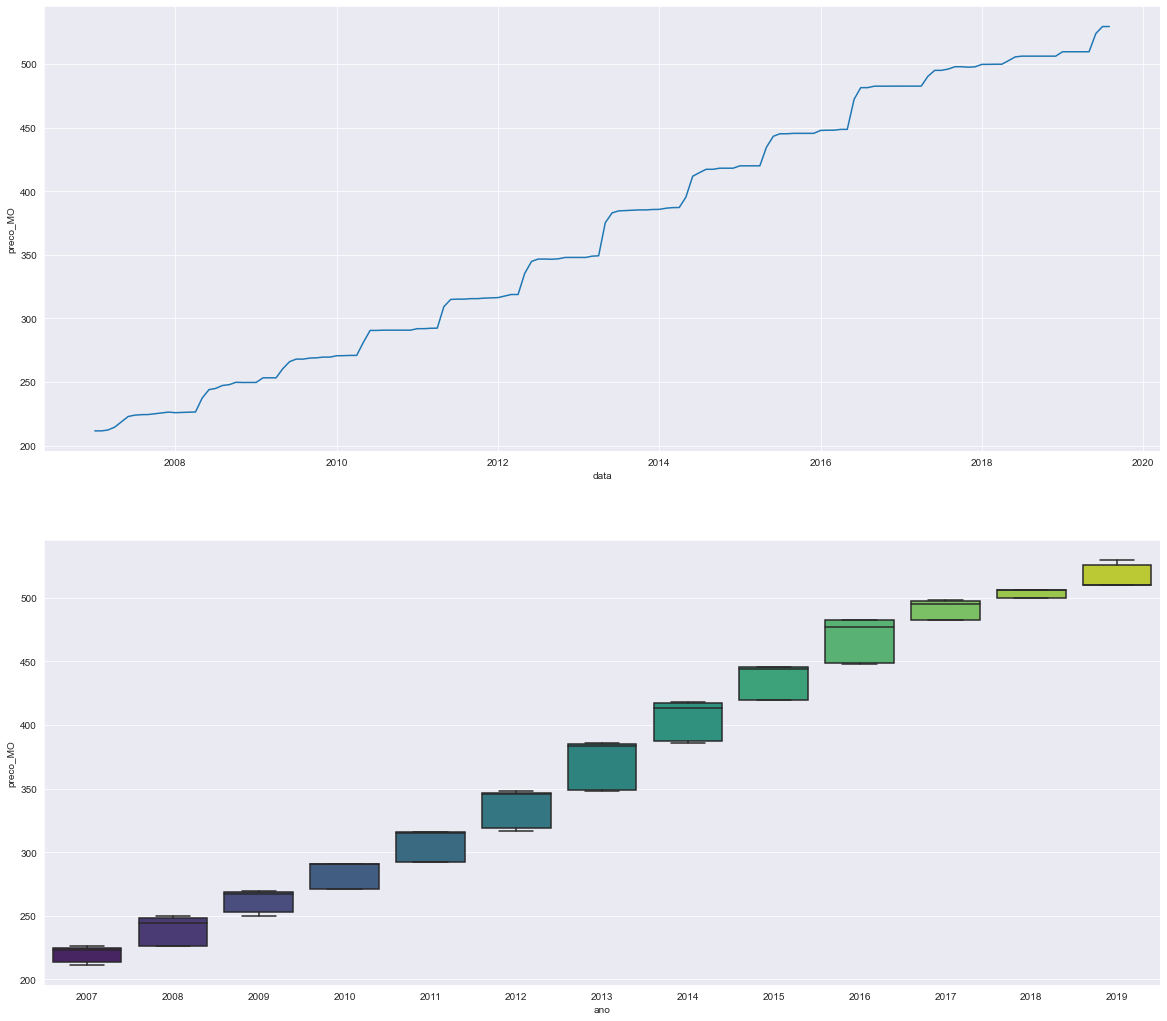

In [90]:
#Visualizar os dados - PREÇO MÃO-DE-OBRA
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(20,18))

sns.lineplot(x= 'data', y = 'preco_MO', data=df2, ax = ax1)
sns.boxplot(x = 'ano', y = 'preco_MO', data=df2, ax = ax2, palette = 'viridis');

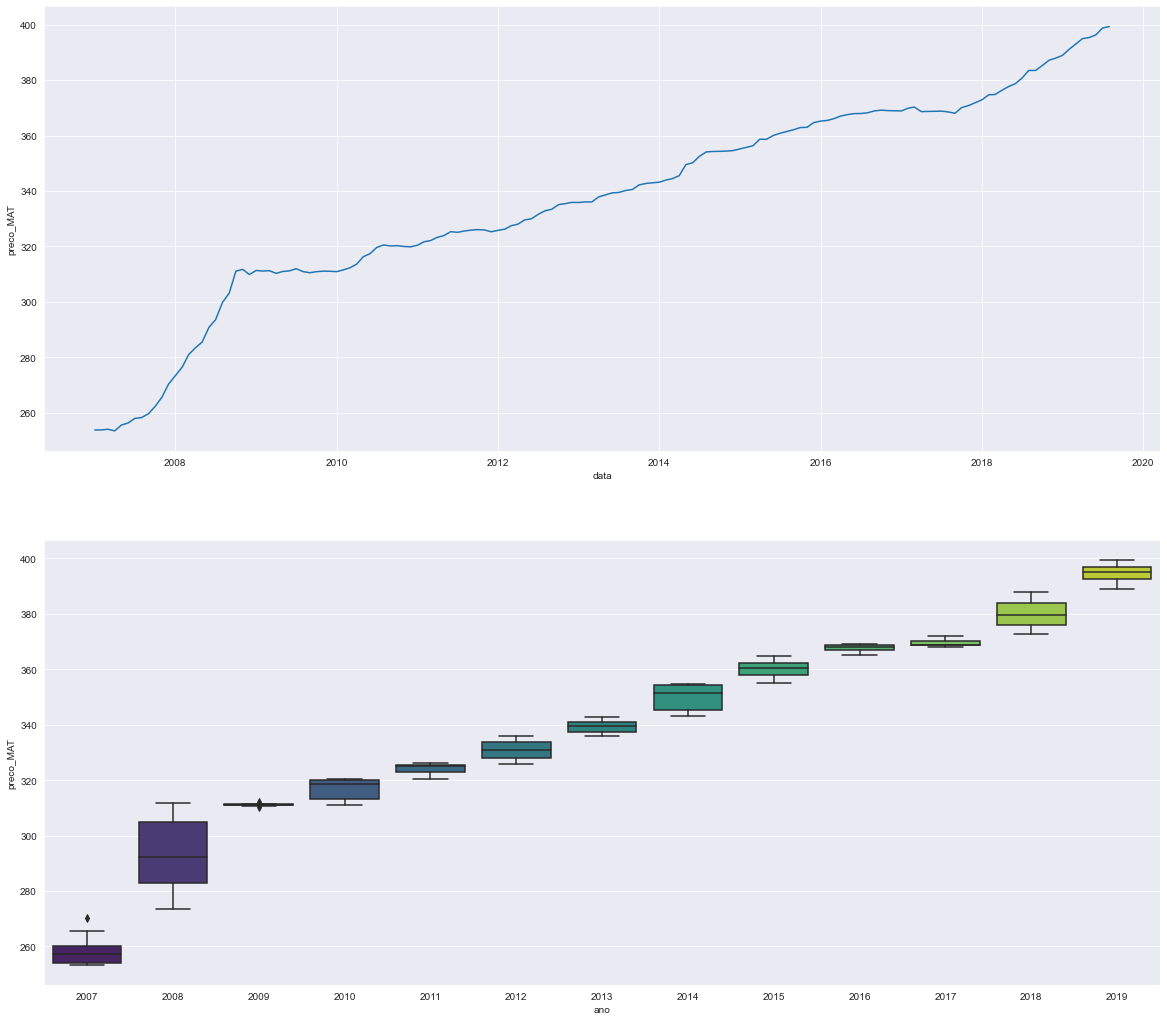

In [91]:
#Visualizar os dados - PREÇO MATERIAL
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(20,18))

sns.lineplot(x= 'data', y = 'preco_MAT', data=df2, ax = ax1)
sns.boxplot(x = 'ano', y = 'preco_MAT', data=df2, ax = ax2, palette = 'viridis');

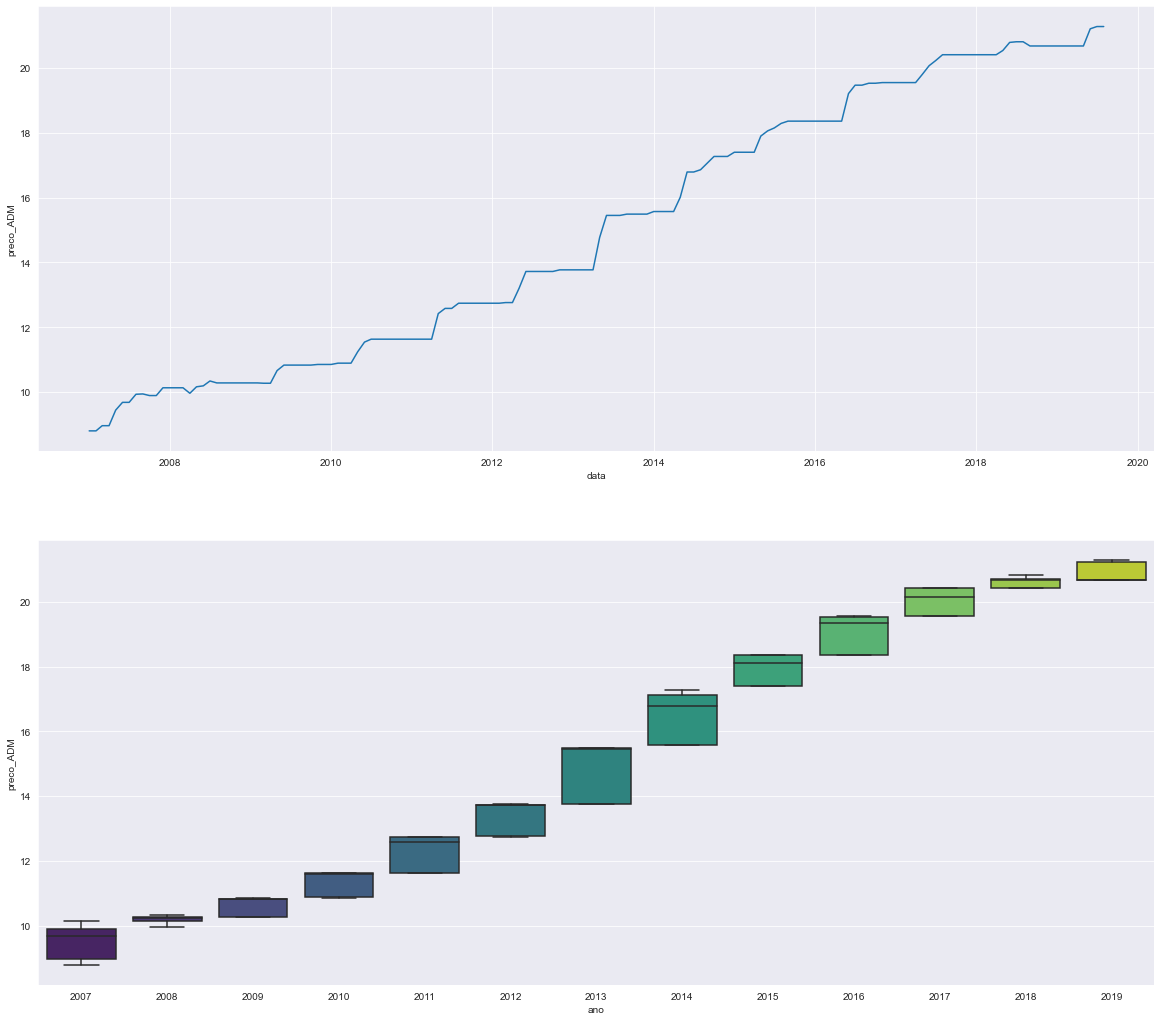

In [92]:
#Visualizar os dados - PREÇO ADMINISTRAÇÃO
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(20,18))

sns.lineplot(x= 'data', y = 'preco_ADM', data=df2, ax = ax1)
sns.boxplot(x = 'ano', y = 'preco_ADM', data=df2, ax = ax2, palette = 'viridis');

In [93]:
#treinar com os valores de 2007 a 2018 | testar com os valores de 2019
df2_train = df2.loc[df2['ano'] <= 2018]
df2_test = df2.loc[df2['ano'] == 2019]

In [94]:
df2_train.tail()

,ano,mes,preco_global,preco_MO,preco_MAT,preco_ADM,data
139,2018,8,910.42,506.13,383.48,20.81,2018-08-01
140,2018,9,910.30,506.13,383.49,20.68,2018-09-01
141,2018,10,912.05,506.13,385.24,20.68,2018-10-01
142,2018,11,913.99,506.13,387.18,20.68,2018-11-01
143,2018,12,914.74,506.13,387.93,20.68,2018-12-01


In [95]:
df2_test

,ano,mes,preco_global,preco_MO,preco_MAT,preco_ADM,data
144,2019,1,919.19,509.57,388.94,20.68,2019-01-01
145,2019,2,921.45,509.57,391.20,20.68,2019-02-01
146,2019,3,923.19,509.57,392.94,20.68,2019-03-01
147,2019,4,925.21,509.57,394.96,20.68,2019-04-01
148,2019,5,925.60,509.57,395.35,20.68,2019-05-01
149,2019,6,941.49,523.96,396.32,21.21,2019-06-01
150,2019,7,949.47,529.40,398.79,21.28,2019-07-01
151,2019,8,950.01,529.40,399.33,21.28,2019-08-01


### Ajustando o df de train para o formato do PROPHET

In [96]:
#usando os valores de preco_global
df2_1 = df2_train[['data', 'preco_global']]

In [97]:
#Padronizar as colunas para o modelo
df2_1.columns = ['ds', 'y']

In [98]:
df2_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      144 non-null    datetime64[ns]
 1   y       144 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.4 KB


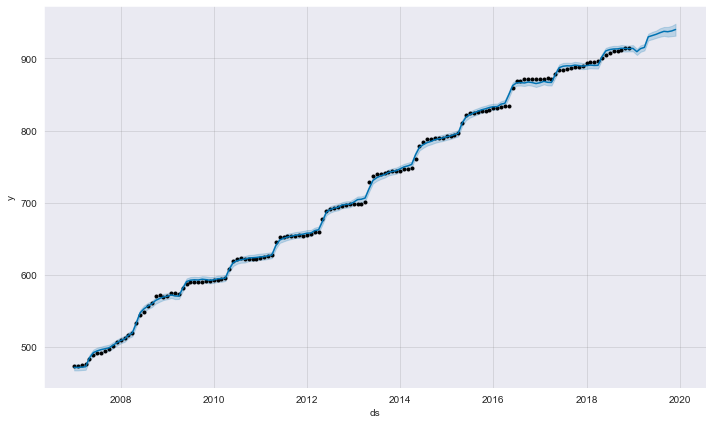

In [99]:
# Rodando o modelo - considerando sazonalidade dentro dos anos e fazendo previsão mensal
m2 = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False).fit(df2_1)
future2 = m2.make_future_dataframe(periods=12, freq='M')
fcst2 = m2.predict(future2)
fig1_2 = m2.plot(fcst2)

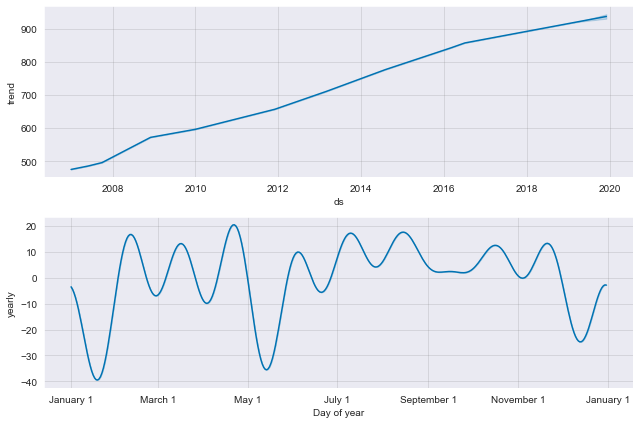

In [100]:
#Componentes do modelo - sazonalidade e tendência
fig2_2 = m2.plot_components(fcst2)

In [101]:
#Valores previstos
model2 = fcst2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
model2 = model2.round(2)
model2.tail(12)

,ds,yhat,yhat_lower,yhat_upper
144,2018-12-31,913.80,909.64,918.29
145,2019-01-31,909.19,904.62,913.13
146,2019-02-28,913.38,909.00,917.91
147,2019-03-31,915.15,910.97,919.74
148,2019-04-30,929.74,924.89,934.04
149,2019-05-31,931.46,926.44,936.65
150,2019-06-30,933.19,928.23,938.34
151,2019-07-31,935.42,929.88,941.60
152,2019-08-31,937.36,931.05,943.44
153,2019-09-30,936.85,930.05,943.47


In [102]:
#Separar o modelo com as dados de 2019 para comparar com os valores reais
model2 = model2.loc[model2['ds']>='2019-01-01']

In [103]:
model2['ano'] = model2['ds'].dt.year
model2['mes'] = model2['ds'].dt.month

In [104]:
model2 = model2.loc[model2['mes']<=8]

In [105]:
model2['data'] = model2['ano'].map(str) + '-' + model2['mes'].map(str)
model2['ds'] = pd.to_datetime(model2['data'], format = '%Y-%m')

In [106]:
model2.drop(['ano', 'mes', 'data'], axis=1, inplace=True)
model2

,ds,yhat,yhat_lower,yhat_upper
145,2019-01-01,909.19,904.62,913.13
146,2019-02-01,913.38,909.00,917.91
147,2019-03-01,915.15,910.97,919.74
148,2019-04-01,929.74,924.89,934.04
149,2019-05-01,931.46,926.44,936.65
150,2019-06-01,933.19,928.23,938.34
151,2019-07-01,935.42,929.88,941.60
152,2019-08-01,937.36,931.05,943.44


In [107]:
model2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 145 to 152
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   ds          8 non-null      datetime64[ns]
 1   yhat        8 non-null      float64       
 2   yhat_lower  8 non-null      float64       
 3   yhat_upper  8 non-null      float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 320.0 bytes


In [108]:
df_test2 = df2_test[['data', 'preco_global']]
df_test2.columns = ['ds', 'y']

In [109]:
df_test2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 144 to 151
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      8 non-null      datetime64[ns]
 1   y       8 non-null      float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 192.0 bytes


In [110]:
#juntando os valores de teste e previsão para analisar a qualidade do modelo
df_val2 = pd.merge(df_test2, model2, on='ds')
df_val2

,ds,y,yhat,yhat_lower,yhat_upper
0,2019-01-01,919.19,909.19,904.62,913.13
1,2019-02-01,921.45,913.38,909.00,917.91
2,2019-03-01,923.19,915.15,910.97,919.74
3,2019-04-01,925.21,929.74,924.89,934.04
4,2019-05-01,925.60,931.46,926.44,936.65
5,2019-06-01,941.49,933.19,928.23,938.34
6,2019-07-01,949.47,935.42,929.88,941.60
7,2019-08-01,950.01,937.36,931.05,943.44


In [111]:
df_val2['dif'] = df_val2['y'] - df_val2['yhat']
df_val2

,ds,y,yhat,yhat_lower,yhat_upper,dif
0,2019-01-01,919.19,909.19,904.62,913.13,10.00
1,2019-02-01,921.45,913.38,909.00,917.91,8.07
2,2019-03-01,923.19,915.15,910.97,919.74,8.04
3,2019-04-01,925.21,929.74,924.89,934.04,-4.53
4,2019-05-01,925.60,931.46,926.44,936.65,-5.86
5,2019-06-01,941.49,933.19,928.23,938.34,8.30
6,2019-07-01,949.47,935.42,929.88,941.60,14.05
7,2019-08-01,950.01,937.36,931.05,943.44,12.65


In [112]:
df_val2.describe().round(2)

,y,yhat,yhat_lower,yhat_upper,dif
count,8.00,8.00,8.00,8.00,8.00
mean,931.95,925.61,920.64,930.61,6.34
std,12.87,11.16,10.61,11.82,7.46
min,919.19,909.19,904.62,913.13,-5.86
25%,922.75,914.71,910.48,919.28,4.90
50%,925.40,930.60,925.66,935.34,8.18
75%,943.49,933.75,928.64,939.16,10.66
max,950.01,937.36,931.05,943.44,14.05


In [113]:
df_val2['mes'] = df_val2['ds'].dt.month

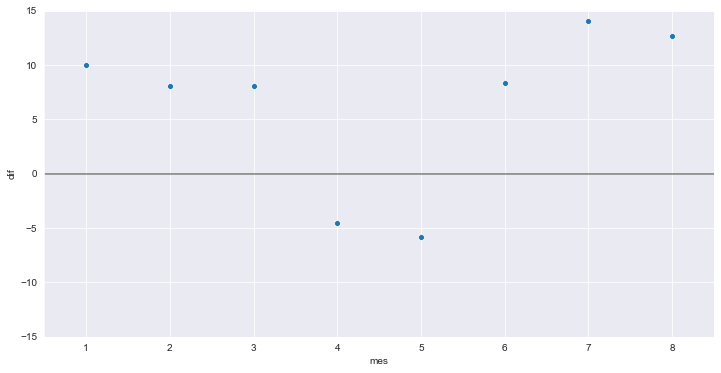

In [114]:
#Análise dos erros - estão na faixa de R$10 a R$20
fig, ax = plt.subplots(figsize=(12,6))
plt.ylim(-15,15)
plt.xlim(0.5,8.5)
ref = 0
ref2 = [*range(0, 10)]
sns.scatterplot(x = 'mes', y = 'dif', data=df_val2)
sns.lineplot(x = ref2, y = ref, color = 'black', alpha=0.5);

In [115]:
print('Soma dos erros: R$', df_val2['dif'].sum().round(2))
print('Média dos erros: R$', df_val2['dif'].mean().round(2))

Soma dos erros: R$ 50.72
Média dos erros: R$ 6.34


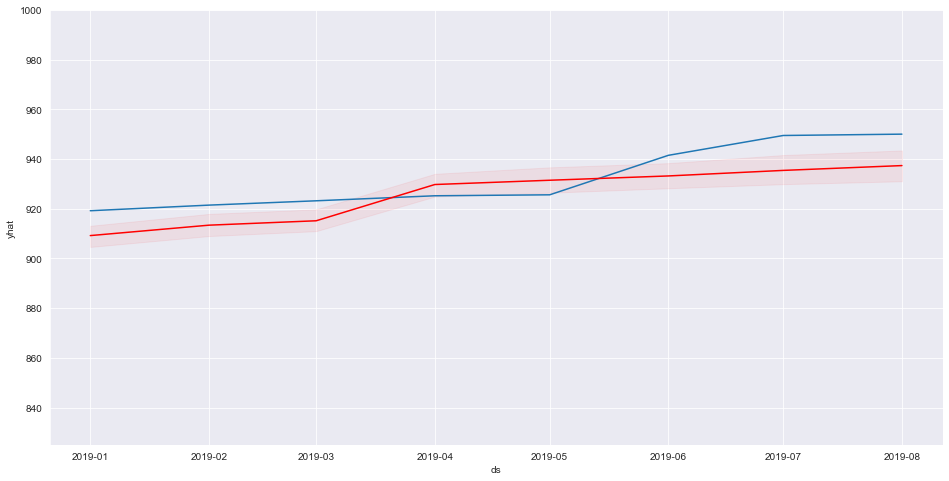

In [116]:
#Comparando o valor real do previsto para 2019 - teve um atraso em 2019 no aumento mais significativo do ano
fig, ax = plt.subplots(figsize=(16,8))
plt.ylim(825,1000)

sns.lineplot(x='ds', y='y', data=df_val2)
sns.lineplot(x='ds', y='yhat', data=df_val2, color='red')
ax.fill_between(df_val2['ds'], df_val2['yhat_upper'], df_val2['yhat_lower'], color='red', alpha=0.06);